In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # T-test를 위한 라이브러리


### 1. acoustic과 label 관계

In [3]:
# acoustic_label 데이터 경로
ac_label_path = 'C:/Users/parkm/Desktop/data/1/trans_to_csv/acoustic_label/'

'C:/Users/parkm/Desktop/data/1/trans_to_csv/acoustic_label/' 폴더의 Acoustic 데이터 상관계수 및 T-test 분석 시작...

--- 합쳐진 Acoustic 데이터의 상위 5행 (일부) ---
     Time_s   Pa_Col1  label
0  0.000003  0.041553      1
1  0.000023  0.091455      1
2  0.000042  0.173804      1
3  0.000062  0.241284      1
4  0.000081  0.345874      1

총 데이터 포인트 수: 15360000
라벨 분포:
label
1    12288000
0     3072000
Name: count, dtype: int64

--- Acoustic (Pa_Col1) 데이터와 라벨 간의 상관관계 ---
          Pa_Col1     label
Pa_Col1  1.000000  0.000045
label    0.000045  1.000000

--- 'label' 컬럼과의 Pa_Col1 상관계수 ---
Pa_Col1과 label의 상관계수: 0.0000


C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


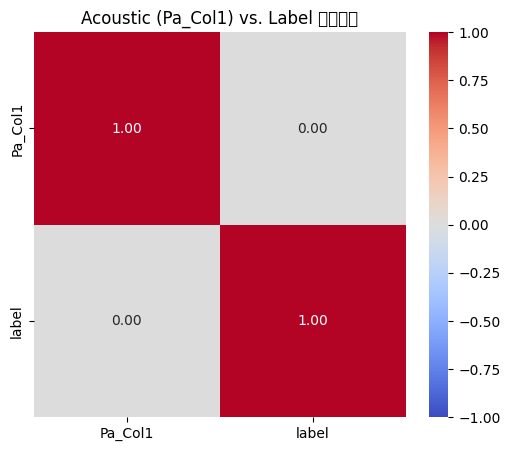


--- Acoustic (Pa_Col1) 데이터 T-test 분석 시작 ---
정상 데이터 샘플 수: 3072000, 평균: -0.0001, 표준편차: 0.1476
고장 데이터 샘플 수: 12288000, 평균: -0.0000, 표준편차: 0.7154

--- T-test 결과 ---
T-Statistic: -0.3292
P-Value: 7.4197e-01
P-Value (7.4197e-01)가 유의 수준 (0.05)보다 크므로,
귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 Pa_Col1 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

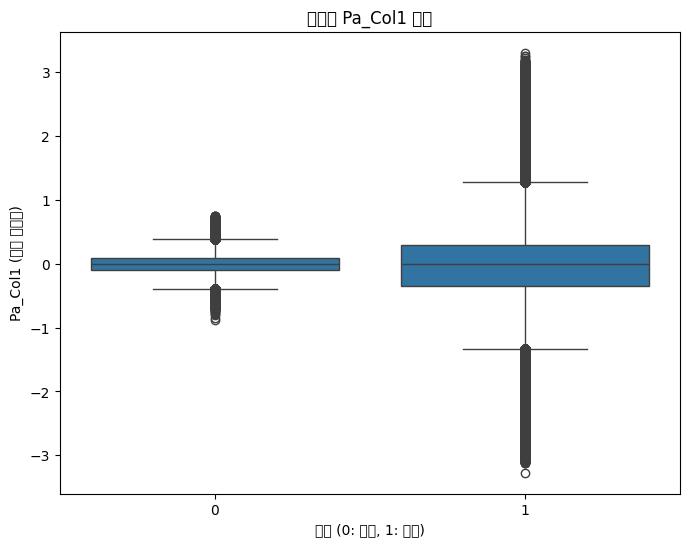


Acoustic 데이터 상관계수 및 T-test 분석 완료.


In [7]:
print(f"'{ac_label_path}' 폴더의 Acoustic 데이터 상관계수 및 T-test 분석 시작...")

# 모든 '_tr.csv' 파일 목록 가져오기
ac_tr_files = glob.glob(os.path.join(ac_label_path, '*_tr.csv'))

if not ac_tr_files:
    print(f"경고: '{ac_label_path}' 폴더에서 '_tr.csv' 파일을 찾을 수 없습니다. 파일을 먼저 생성해주세요.")
else:
    # 모든 acoustic 데이터를 하나의 DataFrame으로 합치기
    all_acoustic_data = []
    
    for file_path in ac_tr_files:
        try:
            df = pd.read_csv(file_path)
            # 'Time_s', 'Pa_Col1', 'label' 컬럼이 있다고 가정합니다.
            if 'Time_s' in df.columns and 'Pa_Col1' in df.columns and 'label' in df.columns:
                all_acoustic_data.append(df[['Time_s', 'Pa_Col1', 'label']])
            else:
                print(f"  경고: {os.path.basename(file_path)} 파일에 필요한 컬럼(Time_s, Pa_Col1, label)이 없습니다. 건너뜁니다.")
        except Exception as e:
            print(f"  오류: {os.path.basename(file_path)} 파일 로드 중 오류 발생: {e}. 건너뜁니다.")

    if all_acoustic_data:
        # 모든 acoustic 데이터를 하나의 DataFrame으로 합침
        merged_acoustic_df = pd.concat(all_acoustic_data, ignore_index=True)
        
        print("\n--- 합쳐진 Acoustic 데이터의 상위 5행 (일부) ---")
        print(merged_acoustic_df.head())
        print(f"\n총 데이터 포인트 수: {len(merged_acoustic_df)}")
        print(f"라벨 분포:\n{merged_acoustic_df['label'].value_counts()}")

        # --- 1. 상관관계 분석 ---
        correlation_matrix = merged_acoustic_df[['Pa_Col1', 'label']].corr(numeric_only=True)
        
        print("\n--- Acoustic (Pa_Col1) 데이터와 라벨 간의 상관관계 ---")
        print(correlation_matrix)

        print("\n--- 'label' 컬럼과의 Pa_Col1 상관계수 ---")
        print(f"Pa_Col1과 label의 상관계수: {correlation_matrix.loc['Pa_Col1', 'label']:.4f}")
        
        # 상관관계 시각화 (heatmap)
        plt.figure(figsize=(6, 5))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        plt.title('Acoustic (Pa_Col1) vs. Label 상관관계')
        plt.show()

        # --- 2. T-test 분석 ---
        print("\n--- Acoustic (Pa_Col1) 데이터 T-test 분석 시작 ---")

        # 정상 그룹 데이터 (label = 0)
        normal_data = merged_acoustic_df[merged_acoustic_df['label'] == 0]['Pa_Col1']
        # 고장 그룹 데이터 (label = 1)
        fault_data = merged_acoustic_df[merged_acoustic_df['label'] == 1]['Pa_Col1']
        
        # 두 그룹의 데이터가 충분히 있는지 확인
        if len(normal_data) > 1 and len(fault_data) > 1:
            print(f"정상 데이터 샘플 수: {len(normal_data)}, 평균: {normal_data.mean():.4f}, 표준편차: {normal_data.std():.4f}")
            print(f"고장 데이터 샘플 수: {len(fault_data)}, 평균: {fault_data.mean():.4f}, 표준편차: {fault_data.std():.4f}")

            # 독립 표본 t-test 수행 (Welch's t-test로 등분산 가정 필요 없음)
            t_statistic, p_value = stats.ttest_ind(normal_data, fault_data, equal_var=False)

            print(f"\n--- T-test 결과 ---")
            print(f"T-Statistic: {t_statistic:.4f}")
            print(f"P-Value: {p_value:.4e}") # 과학적 표기법으로 출력
            
            # 유의 수준 (alpha) 설정
            alpha = 0.05
            
            if p_value < alpha:
                print(f"P-Value ({p_value:.4e})가 유의 수준 ({alpha})보다 작으므로,")
                print("귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 Pa_Col1 평균에는 통계적으로 유의미한 차이가 있습니다.")
            else:
                print(f"P-Value ({p_value:.4e})가 유의 수준 ({alpha})보다 크므로,")
                print("귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 Pa_Col1 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.")

            # 박스 플롯으로 분포 다시 확인
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='label', y='Pa_Col1', data=merged_acoustic_df)
            plt.title('라벨별 Pa_Col1 분포')
            plt.xlabel('라벨 (0: 정상, 1: 고장)')
            plt.ylabel('Pa_Col1 (음향 데이터)')
            plt.show()

        else:
            print("t-test를 수행하기 위한 각 그룹의 데이터 수가 충분하지 않습니다 (최소 2개 필요).")
    else:
        print("합칠 수 있는 유효한 Acoustic 데이터가 없어 분석을 수행할 수 없습니다.")

print("\nAcoustic 데이터 상관계수 및 T-test 분석 완료.")

### 2. cur,temp와 label 관계

'C:/Users/parkm/Desktop/data/1/trans_to_csv/cur,temp_label/' 폴더의 Current,Temp 데이터 상관계수 및 T-test 분석 시작...

--- 합쳐진 Current,Temp 데이터의 상위 5행 (일부) ---
   cDAQ9185-1F486B5Mod1/ai0  cDAQ9185-1F486B5Mod1/ai1  \
0                 27.607992                 28.217591   
1                 27.607992                 28.217591   
2                 27.607992                 28.217591   
3                 27.607992                 28.217591   
4                 27.607992                 28.217591   

   cDAQ9185-1F486B5Mod2/ai0  cDAQ9185-1F486B5Mod2/ai2  \
0                  1.894377                  0.949463   
1                  2.128889                  0.926111   
2                  2.373001                  0.882154   
3                  2.087747                  1.193974   
4                  2.393572                  1.125291   

   cDAQ9185-1F486B5Mod2/ai3  label  
0                 -2.165271      1  
1                 -2.309938      1  
2                 -2.526938      1  
3                 -

C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


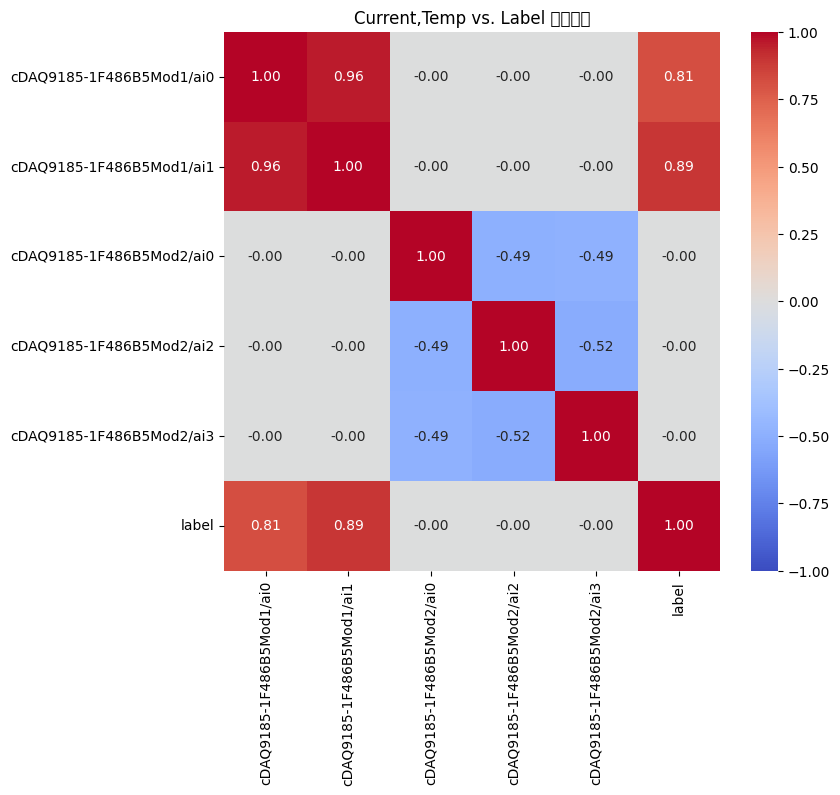


--- Current,Temp 데이터 T-test 분석 시작 ---

--- 컬럼: cDAQ9185-1F486B5Mod1/ai0 에 대한 T-test ---
  정상 데이터 샘플 수: 7682458, 평균: 26.2680, 표준편차: 0.5103
  고장 데이터 샘플 수: 6145968, 평균: 28.4281, 표준편차: 0.9967
  T-Statistic: -4884.8370
  P-Value: 0.0000e+00
  P-Value (0.0000e+00)가 유의 수준 (0.05)보다 작으므로,
  귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 cDAQ9185-1F486B5Mod1/ai0 평균에는 통계적으로 유의미한 차이가 있습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

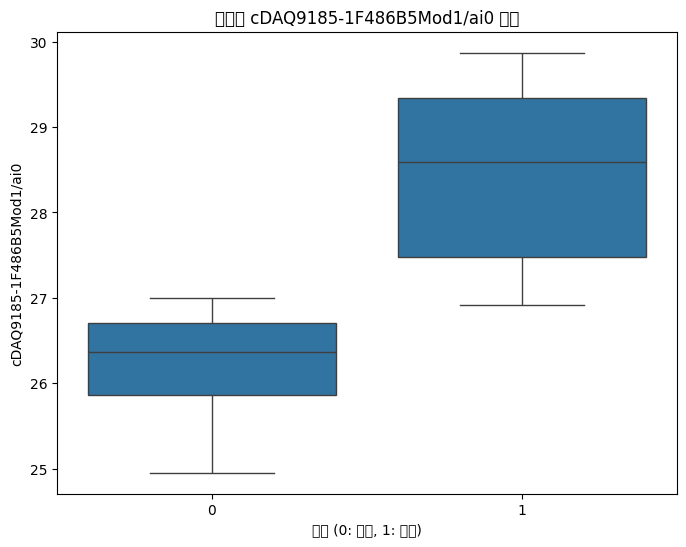


--- 컬럼: cDAQ9185-1F486B5Mod1/ai1 에 대한 T-test ---
  정상 데이터 샘플 수: 7682458, 평균: 26.4909, 표준편차: 0.5700
  고장 데이터 샘플 수: 6145968, 평균: 29.2026, 표준편차: 0.7883
  T-Statistic: -7161.2752
  P-Value: 0.0000e+00
  P-Value (0.0000e+00)가 유의 수준 (0.05)보다 작으므로,
  귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 cDAQ9185-1F486B5Mod1/ai1 평균에는 통계적으로 유의미한 차이가 있습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

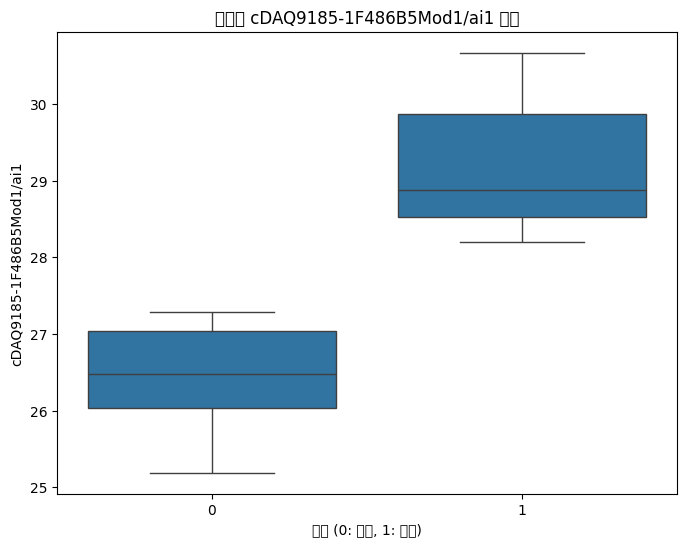


--- 컬럼: cDAQ9185-1F486B5Mod2/ai0 에 대한 T-test ---
  정상 데이터 샘플 수: 7682458, 평균: 0.0381, 표준편차: 2.2006
  고장 데이터 샘플 수: 6145968, 평균: 0.0354, 표준편차: 2.2713
  T-Statistic: 2.2274
  P-Value: 2.5923e-02
  P-Value (2.5923e-02)가 유의 수준 (0.05)보다 작으므로,
  귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 cDAQ9185-1F486B5Mod2/ai0 평균에는 통계적으로 유의미한 차이가 있습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

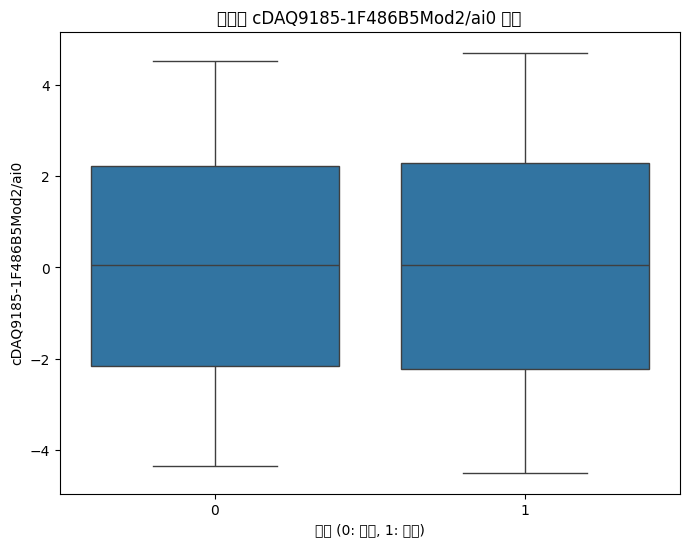


--- 컬럼: cDAQ9185-1F486B5Mod2/ai2 에 대한 T-test ---
  정상 데이터 샘플 수: 7682458, 평균: -0.0780, 표준편차: 2.1736
  고장 데이터 샘플 수: 3072984, 평균: -0.0911, 표준편차: 2.3170
  T-Statistic: 8.5581
  P-Value: 1.1478e-17
  P-Value (1.1478e-17)가 유의 수준 (0.05)보다 작으므로,
  귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 cDAQ9185-1F486B5Mod2/ai2 평균에는 통계적으로 유의미한 차이가 있습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

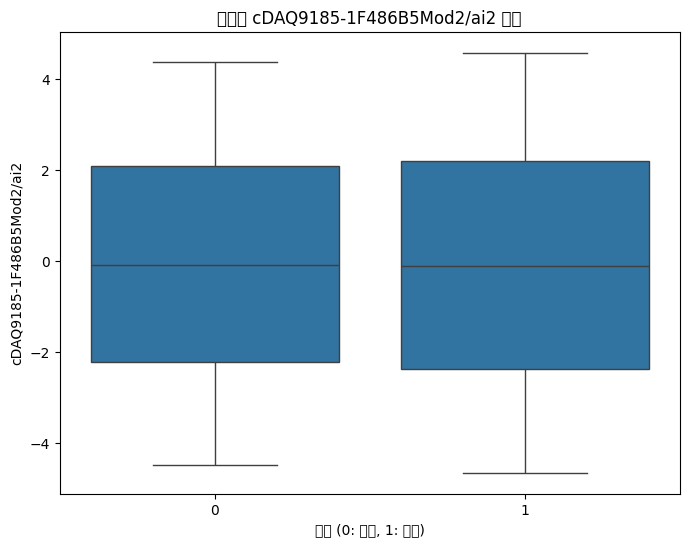


--- 컬럼: cDAQ9185-1F486B5Mod2/ai3 에 대한 T-test ---
  정상 데이터 샘플 수: 7682458, 평균: 0.0457, 표준편차: 1.7224
  고장 데이터 샘플 수: 3072984, 평균: 0.0337, 표준편차: 1.8100
  T-Statistic: 9.9308
  P-Value: 3.0588e-23
  P-Value (3.0588e-23)가 유의 수준 (0.05)보다 작으므로,
  귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 cDAQ9185-1F486B5Mod2/ai3 평균에는 통계적으로 유의미한 차이가 있습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

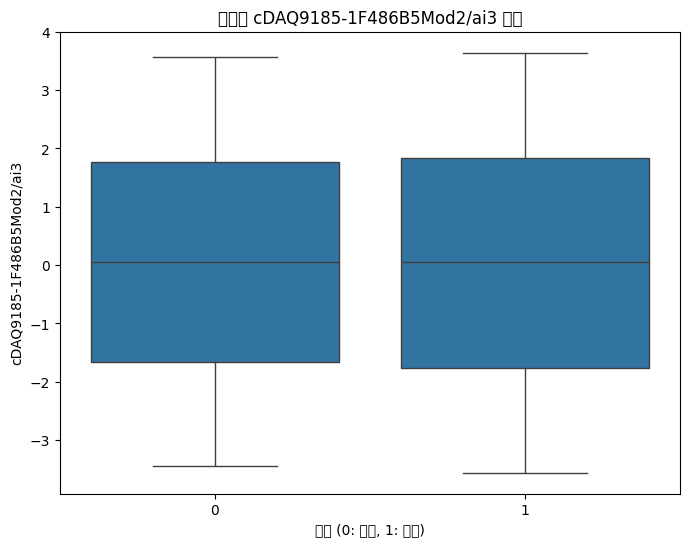


Current,Temp 데이터 상관계수 및 T-test 분석 완료.


In [8]:
# cur,temp_label 데이터 경로
ct_label_path = 'C:/Users/parkm/Desktop/data/1/trans_to_csv/cur,temp_label/'

print(f"'{ct_label_path}' 폴더의 Current,Temp 데이터 상관계수 및 T-test 분석 시작...")

# 모든 '_tr.csv' 파일 목록 가져오기
ct_tr_files = glob.glob(os.path.join(ct_label_path, '*_tr.csv'))

if not ct_tr_files:
    print(f"경고: '{ct_label_path}' 폴더에서 '_tr.csv' 파일을 찾을 수 없습니다. 파일을 먼저 생성해주세요.")
else:
    # 모든 current,temp 데이터를 하나의 DataFrame으로 합치기
    all_ct_data = []
    
    # 첫 파일에서 데이터 컬럼명 목록을 가져오기 위한 플래그
    data_columns = []

    for file_path in ct_tr_files:
        try:
            df = pd.read_csv(file_path)
            # 'label' 컬럼이 있는지 확인 (라벨링 단계에서 추가됨)
            if 'label' in df.columns:
                all_ct_data.append(df)
                # 첫 파일을 로드할 때 데이터 컬럼 목록을 저장 (Time_s와 label 제외)
                if not data_columns:
                    data_columns = [col for col in df.columns if col not in ['Time_s', 'label']]
            else:
                print(f"  경고: {os.path.basename(file_path)} 파일에 'label' 컬럼이 없습니다. 건너뜁니다.")
        except Exception as e:
            print(f"  오류: {os.path.basename(file_path)} 파일 로드 중 오류 발생: {e}. 건너뜝니다.")

    if all_ct_data:
        # 모든 current,temp 데이터를 하나의 DataFrame으로 합침
        merged_ct_df = pd.concat(all_ct_data, ignore_index=True)
        
        print("\n--- 합쳐진 Current,Temp 데이터의 상위 5행 (일부) ---")
        print(merged_ct_df.head())
        print(f"\n총 데이터 포인트 수: {len(merged_ct_df)}")
        print(f"라벨 분포:\n{merged_ct_df['label'].value_counts()}")

        # --- 1. 상관관계 분석 ---
        # 데이터 컬럼들과 'label' 컬럼 간의 상관관계 계산
        # 'Time_s'는 상관관계 분석에서 의미 없으므로 제외
        cols_for_corr = data_columns + ['label']
        if not cols_for_corr:
            print("\n상관관계 분석을 위한 데이터 컬럼을 찾을 수 없습니다.")
        else:
            correlation_matrix = merged_ct_df[cols_for_corr].corr(numeric_only=True)
            
            print("\n--- Current,Temp 데이터와 라벨 간의 상관관계 ---")
            print(correlation_matrix)

            print("\n--- 'label' 컬럼과의 상관계수 ---")
            print(correlation_matrix['label'].sort_values(ascending=False))
            
            # 상관관계 시각화 (heatmap)
            plt.figure(figsize=(8, 7))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
            plt.title('Current,Temp vs. Label 상관관계')
            plt.show()

        # --- 2. T-test 분석 ---
        print("\n--- Current,Temp 데이터 T-test 분석 시작 ---")

        for col in data_columns:
            print(f"\n--- 컬럼: {col} 에 대한 T-test ---")
            
            # 정상 그룹 데이터 (label = 0)
            normal_data = merged_ct_df[merged_ct_df['label'] == 0][col].dropna() # 결측치 제거
            
            # 고장 그룹 데이터 (label = 1)
            fault_data = merged_ct_df[merged_ct_df['label'] == 1][col].dropna() # 결측치 제거
            
            # 두 그룹의 데이터가 충분히 있는지 확인
            if len(normal_data) > 1 and len(fault_data) > 1:
                print(f"  정상 데이터 샘플 수: {len(normal_data)}, 평균: {normal_data.mean():.4f}, 표준편차: {normal_data.std():.4f}")
                print(f"  고장 데이터 샘플 수: {len(fault_data)}, 평균: {fault_data.mean():.4f}, 표준편차: {fault_data.std():.4f}")

                # 독립 표본 t-test 수행 (Welch's t-test로 등분산 가정 필요 없음)
                t_statistic, p_value = stats.ttest_ind(normal_data, fault_data, equal_var=False)

                print(f"  T-Statistic: {t_statistic:.4f}")
                print(f"  P-Value: {p_value:.4e}")
                
                # 유의 수준 (alpha) 설정
                alpha = 0.05
                
                if p_value < alpha:
                    print(f"  P-Value ({p_value:.4e})가 유의 수준 ({alpha})보다 작으므로,")
                    print(f"  귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 {col} 평균에는 통계적으로 유의미한 차이가 있습니다.")
                else:
                    print(f"  P-Value ({p_value:.4e})가 유의 수준 ({alpha})보다 크므로,")
                    print(f"  귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 {col} 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.")

                # 박스 플롯으로 분포 확인
                plt.figure(figsize=(8, 6))
                sns.boxplot(x='label', y=col, data=merged_ct_df)
                plt.title(f'라벨별 {col} 분포')
                plt.xlabel('라벨 (0: 정상, 1: 고장)')
                plt.ylabel(col)
                plt.show()

            else:
                print(f"  컬럼 '{col}': t-test를 수행하기 위한 각 그룹의 데이터 수가 충분하지 않습니다 (최소 2개 필요).")
    else:
        print("합칠 수 있는 유효한 Current,Temp 데이터가 없어 분석을 수행할 수 없습니다.")

print("\nCurrent,Temp 데이터 상관계수 및 T-test 분석 완료.")

### 3. vibration과 label 관계

In [10]:
# vibration_label 데이터 경로
vib_label_path = 'C:/Users/parkm/Desktop/data/1/trans_to_csv/vibration_label/'


--- 합쳐진 Vibration 데이터의 상위 5행 (일부) ---
     g_Col1     g_Col2    g_Col3    g_Col4  label
0 -8.947968  14.536224 -1.054167  0.969664      1
1  2.321366  -2.065806 -1.840423  3.046795      1
2  0.273554   2.071666 -0.860117  2.146393      1
3 -7.890409  15.446308 -0.465193  1.381279      1
4 -1.295177  -0.780089  0.003352 -0.305207      1

총 데이터 포인트 수: 12152053
라벨 분포:
label
1    6144000
0    6008053
Name: count, dtype: int64

--- Vibration (모든 g_Col) 데이터와 라벨 간의 상관관계 ---
          g_Col1    g_Col2    g_Col3    g_Col4     label
g_Col1  1.000000 -0.370032 -0.299896  0.076249  0.000011
g_Col2 -0.370032  1.000000  0.012087  0.164759  0.000052
g_Col3 -0.299896  0.012087  1.000000 -0.003890  0.000134
g_Col4  0.076249  0.164759 -0.003890  1.000000  0.000031
label   0.000011  0.000052  0.000134  0.000031  1.000000

--- 'label' 컬럼과의 상관계수 ---
label     1.000000
g_Col3    0.000134
g_Col2    0.000052
g_Col4    0.000031
g_Col1    0.000011
Name: label, dtype: float64


C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4

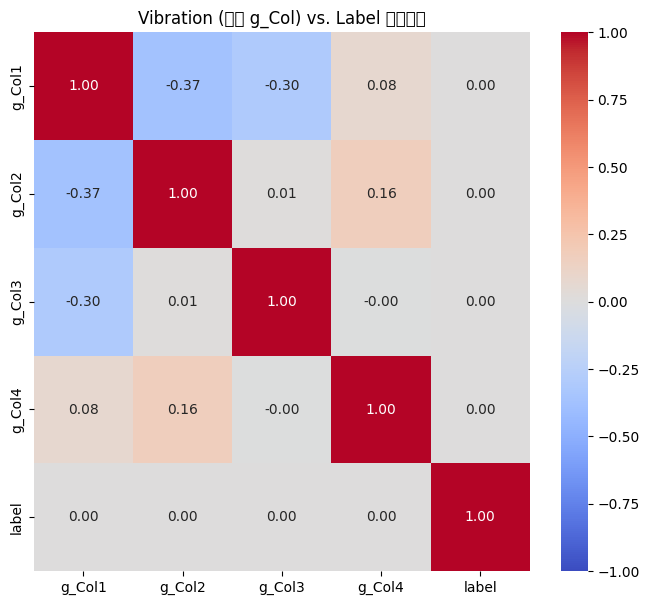


--- Vibration (모든 g_Col) 데이터 T-test 분석 시작 ---

--- 컬럼: g_Col1 에 대한 T-test ---
  정상 데이터 샘플 수: 6008053, 평균: -0.0000, 표준편차: 0.9919
  고장 데이터 샘플 수: 6144000, 평균: 0.0002, 표준편차: 12.0854
  T-Statistic: -0.0383
  P-Value: 9.6942e-01
  P-Value (9.6942e-01)가 유의 수준 (0.05)보다 크므로,
  귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 g_Col1 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

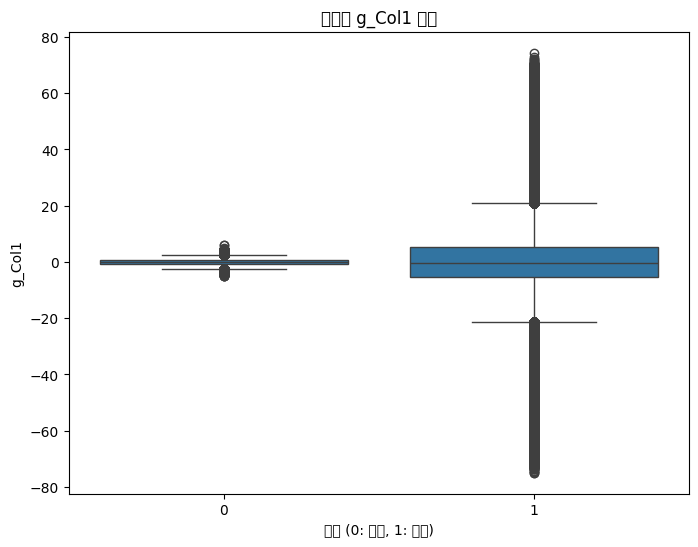


--- 컬럼: g_Col2 에 대한 T-test ---
  정상 데이터 샘플 수: 6008053, 평균: -0.0002, 표준편차: 0.7201
  고장 데이터 샘플 수: 6144000, 평균: 0.0005, 표준편차: 9.8970
  T-Statistic: -0.1839
  P-Value: 8.5407e-01
  P-Value (8.5407e-01)가 유의 수준 (0.05)보다 크므로,
  귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 g_Col2 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

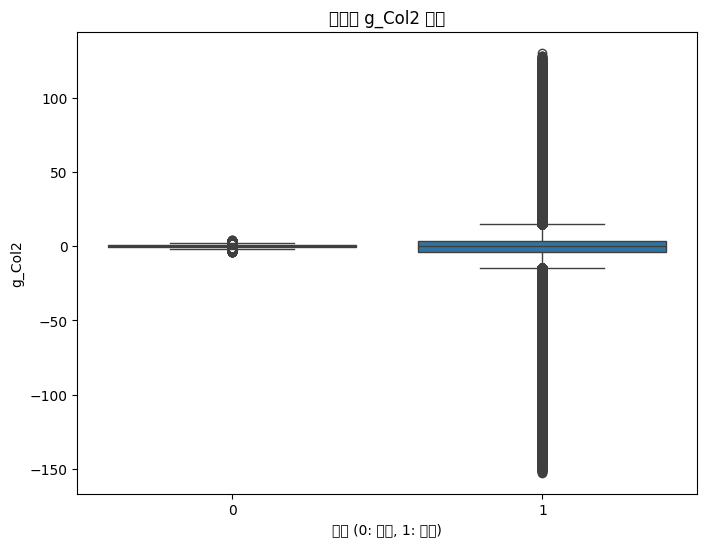


--- 컬럼: g_Col3 에 대한 T-test ---
  정상 데이터 샘플 수: 6008053, 평균: -0.0000, 표준편차: 0.7109
  고장 데이터 샘플 수: 6144000, 평균: 0.0009, 표준편차: 4.6587
  T-Statistic: -0.4718
  P-Value: 6.3706e-01
  P-Value (6.3706e-01)가 유의 수준 (0.05)보다 크므로,
  귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 g_Col3 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

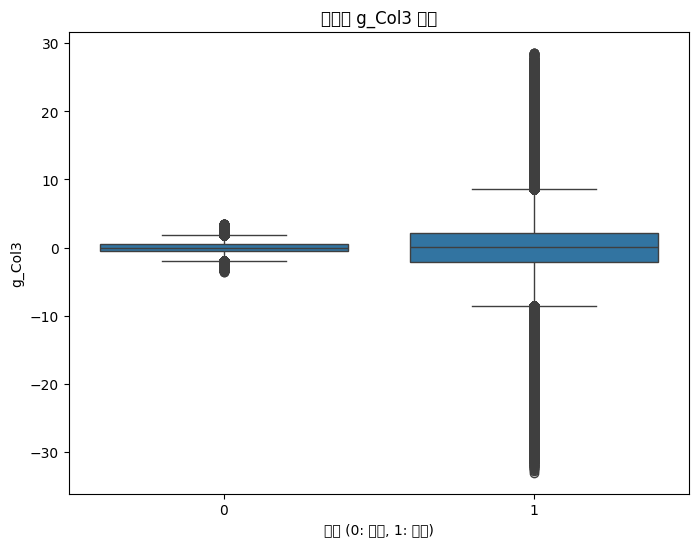


--- 컬럼: g_Col4 에 대한 T-test ---
  정상 데이터 샘플 수: 6008053, 평균: -0.0000, 표준편차: 0.7214
  고장 데이터 샘플 수: 6144000, 평균: 0.0001, 표준편차: 1.9970
  T-Statistic: -0.1074
  P-Value: 9.1444e-01
  P-Value (9.1444e-01)가 유의 수준 (0.05)보다 크므로,
  귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 g_Col4 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.


c:\Users\parkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\parkm\AppData\Roaming\Python\Python311\site-packages\IPytho

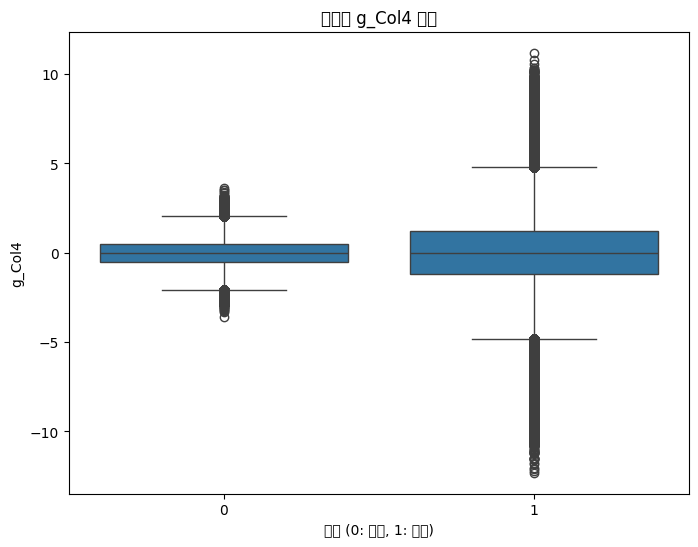


Vibration 데이터 상관계수 및 T-test 분석 완료.


In [12]:
# 모든 '_tr.csv' 파일 목록 가져오기
vib_tr_files = glob.glob(os.path.join(vib_label_path, '*_tr.csv'))

if not vib_tr_files:
    print(f"경고: '{vib_label_path}' 폴더에서 '_tr.csv' 파일을 찾을 수 없습니다. 파일을 먼저 생성해주세요.")
else:
    # 모든 vibration 데이터를 하나의 DataFrame으로 합치기
    all_vibration_data = []
    
    # 첫 파일에서 모든 g_Col 컬럼명 목록을 가져오기 위한 플래그
    data_columns = []

    for file_path in vib_tr_files:
        try:
            df = pd.read_csv(file_path)
            # 'Time_s', 'g_Col1', 'g_Col2', 'g_Col3', 'g_Col4', 'label' 컬럼이 있다고 가정합니다.
            # 모든 g_Col 컬럼과 label을 포함
            # 'label' 컬럼이 있는지 확인 (라벨링 단계에서 추가됨)
            required_cols = ['g_Col1', 'g_Col2', 'g_Col3', 'g_Col4', 'label']
            if all(col in df.columns for col in required_cols):
                all_vibration_data.append(df[required_cols]) # Time_s는 이 분석에서 필요 없음
                # 첫 파일을 로드할 때 데이터 컬럼 목록을 저장
                if not data_columns:
                    data_columns = [col for col in required_cols if col != 'label']
            else:
                print(f"  경고: {os.path.basename(file_path)} 파일에 필요한 컬럼(g_Col1~4, label)이 없습니다. 건너뜁니다.")
        except Exception as e:
            print(f"  오류: {os.path.basename(file_path)} 파일 로드 중 오류 발생: {e}. 건너뜁니다.")

    if all_vibration_data:
        # 모든 vibration 데이터를 하나의 DataFrame으로 합침
        merged_vibration_df = pd.concat(all_vibration_data, ignore_index=True)
        
        print("\n--- 합쳐진 Vibration 데이터의 상위 5행 (일부) ---")
        print(merged_vibration_df.head())
        print(f"\n총 데이터 포인트 수: {len(merged_vibration_df)}")
        print(f"라벨 분포:\n{merged_vibration_df['label'].value_counts()}")

        # --- 1. 상관관계 분석 ---
        # 모든 g_Col 컬럼들과 'label' 컬럼 간의 상관관계 계산
        cols_for_corr = data_columns + ['label']
        if not cols_for_corr:
            print("\n상관관계 분석을 위한 데이터 컬럼을 찾을 수 없습니다.")
        else:
            correlation_matrix = merged_vibration_df[cols_for_corr].corr(numeric_only=True)
            
            print("\n--- Vibration (모든 g_Col) 데이터와 라벨 간의 상관관계 ---")
            print(correlation_matrix)

            print("\n--- 'label' 컬럼과의 상관계수 ---")
            print(correlation_matrix['label'].sort_values(ascending=False))
            
            # 상관관계 시각화 (heatmap)
            plt.figure(figsize=(8, 7))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
            plt.title('Vibration (모든 g_Col) vs. Label 상관관계')
            plt.show()

        # --- 2. T-test 분석 ---
        print("\n--- Vibration (모든 g_Col) 데이터 T-test 분석 시작 ---")

        for col in data_columns: # 모든 g_Col 컬럼에 대해 반복
            print(f"\n--- 컬럼: {col} 에 대한 T-test ---")
            
            # 정상 그룹 데이터 (label = 0)
            normal_data = merged_vibration_df[merged_vibration_df['label'] == 0][col].dropna() # 결측치 제거
            
            # 고장 그룹 데이터 (label = 1)
            fault_data = merged_vibration_df[merged_vibration_df['label'] == 1][col].dropna() # 결측치 제거
            
            # 두 그룹의 데이터가 충분히 있는지 확인
            if len(normal_data) > 1 and len(fault_data) > 1:
                print(f"  정상 데이터 샘플 수: {len(normal_data)}, 평균: {normal_data.mean():.4f}, 표준편차: {normal_data.std():.4f}")
                print(f"  고장 데이터 샘플 수: {len(fault_data)}, 평균: {fault_data.mean():.4f}, 표준편차: {fault_data.std():.4f}")

                # 독립 표본 t-test 수행 (Welch's t-test로 등분산 가정 필요 없음)
                t_statistic, p_value = stats.ttest_ind(normal_data, fault_data, equal_var=False)

                print(f"  T-Statistic: {t_statistic:.4f}")
                print(f"  P-Value: {p_value:.4e}")
                
                # 유의 수준 (alpha) 설정
                alpha = 0.05
                
                if p_value < alpha:
                    print(f"  P-Value ({p_value:.4e})가 유의 수준 ({alpha})보다 작으므로,")
                    print(f"  귀무가설을 기각합니다. 즉, 정상 그룹과 고장 그룹의 {col} 평균에는 통계적으로 유의미한 차이가 있습니다.")
                else:
                    print(f"  P-Value ({p_value:.4e})가 유의 수준 ({alpha})보다 크므로,")
                    print(f"  귀무가설을 기각할 수 없습니다. 즉, 정상 그룹과 고장 그룹의 {col} 평균 간에 통계적으로 유의미한 차이가 있다고 보기 어렵습니다.")

                # 박스 플롯으로 분포 확인
                plt.figure(figsize=(8, 6))
                sns.boxplot(x='label', y=col, data=merged_vibration_df)
                plt.title(f'라벨별 {col} 분포')
                plt.xlabel('라벨 (0: 정상, 1: 고장)')
                plt.ylabel(col)
                plt.show()

            else:
                print(f"  컬럼 '{col}': t-test를 수행하기 위한 각 그룹의 데이터 수가 충분하지 않습니다 (최소 2개 필요).")
    else:
        print("합칠 수 있는 유효한 Vibration 데이터가 없어 분석을 수행할 수 없습니다.")

print("\nVibration 데이터 상관계수 및 T-test 분석 완료.")